# Defining activity coefficients
```{index} Activity coefficients
```
## Activity

Activities ($a$) can be thought at as the “effective concentration” or the “availability of component for reactions”. In aqueous solutions, activity often related to something measurable, i.e. “the concentration”:

$$a_i = \gamma_i \cdot \frac{m_i}{m_0}$$

where

   * $\gamma_i$ is the “rational activity coefficient”.
   * $m_i$ is the molality (mole solute/kg solvent).
   * $m_0$ is the reference state ($m_0 = 1\,molal$).

In this session, we will focus on defining activity coefficients ($\gamma_i$).

## Calculating activity coefficients

We can get $\gamma_i$ by:

1) Some helpful rules

   * $a_{l,s}=1$ for pure liquids or solids.
   * $\gamma_i = 1$  in ideal (or very dilute) solutions.
   
2) Models exist that predict the values of activity coefficients given a set of empirical, substance-specific, constants and a parameter, **ionic strength ($I$)**, that models the effect of other ions and the solvent. Ionic strength accounts for Coulombic interactions and other effects between ions.

$$I = \frac{1}{2} \sum_j m_j z_j^2$$

where $m_j$ = concentration (molarity, molality), and $z_j$ = ionic charge.

   * Since it is **“(charge)$^2$”**, it emphasizes the effect of higher charges from multivalent ions and excludes neutral molecules (charge=0)!
   * $H^+$ and $OH^-$ are generally ignored – their concentrations is typically ~$10^{-7}$ unless working in very acidic or basic conditions, or very dilute situations with trace elements.
   
In theory, to calculate $I$, one should need a full determination of the concentrations of all ions in solutions. However, **in practice, about 99% of dissolved materials in streams, lakes, aquifers and oceans are accounted by 10 elements!**

![](images/DAC1.png)

$\quad$Figure 1: "Analysis and Calculated ionic strengths of some natural waters" (Misra, 2012).

There are several models available for calculating activity coefficients.

(1) Debye-Huckel (limiting) model (useful when $I \leq 0.01\,m$):

$$\log \gamma_i = -A z_i^2 \sqrt{I}$$

(2) Debye-Huckel (extended) model (useful when $I \leq 0.1\,m$):

$$\log \gamma_i = \frac{-A z_i^2 \sqrt{I}}{1+å_i B \sqrt{I}}$$

Some assumptions underlying the Debye-Huckel (extended) model:

    (i) Electrolytes are completely dissociated into ions.
    (ii) Positive ions are surrounded by a cloud of negative charge and vice versa.
    (iii) Size of the ions do not vary with ionic strength.
    (iv) Interactions among aqueous species are fully electrostatic, excludes repulsion for ion of the same charge.

(3) Davies model (useful when $I \leq 0.6\,m$):

$$\log \gamma_i = -A z_i^2 \left[ \frac{\sqrt{I}}{1+\sqrt{I}} -0.3I \right]$$

(4) Truesdell-Jones model (useful when $I \leq 2.0\,m$):

$$\log \gamma_i = \frac{-A z_i^2 \sqrt{I}}{1+å_i B \sqrt{I}} + bI$$

where

   * $I$ is the ionic strength.
   * $A, B$ are constants.
   * $å_i$ is the hydrated, or effective ionic radius of the $i^{th}$ ion.
   * $z_i$ is the ionic charge of the $i^{th}$ ion.
   
There are a few differences between Truesdell-Jones and Davies models important to note.

Truesdell-Jones is basically the same as Debye-Huckel, but

   * with a $+bI$ term at the end,
   * to account for the increase in activity observed from measurements at high ionic strength, due to the lowering of the dielectric constant and therefore increased tendency for ion pairing.
   * other assumptions are similar to Debye-Hueckel.

Whereas the Davies equation has no $å_i$,

   * which is convenient as there are few data for this parameter,
   * but that also means the Davies equation is less accurate. It is OK only to $I<0.6\,m$.
   
The figure below illustrates the environmental differences in ionic strength.

![](images/DAC2.png)

$\quad$Figure 2: The environmental differences in ionic strength (White, 2013).

Following the table of constants we need for the practical, the dependence of activity coefficients on ionic strengths of some ions will be plotted.

In [1]:
# import relevant modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

In [2]:
# create our own functions

# simple molar mass calculator (cannot input the formula containing parentheses e.g. Ca(OH)_2)
def molar_mass_calculator(species):
    atomic_mass_dict = {
        # first 20 elements in the periodic table
        'H': 1.008,
        'He': 4.0026,
        'Li': 6.94,
        'Be': 9.0122,
        'B': 10.81,
        'C': 12.011,
        'N': 14.007,
        'O': 15.999,
        'F': 18.998,
        'Ne': 20.180,
        'Na': 22.99,
        'Mg': 24.305,
        'Al': 26.982,
        'Si': 28.085,
        'P': 30.974,
        'S': 32.06,
        'Cl': 35.45,
        'Ar': 39.948,
        'K': 39.0983,
        'Ca': 40.078
    }
    
    MW = 0

    for key, value in atomic_mass_dict.items():
        element_index = species.find(key)
        number_of_atom = ''
                
        if element_index != -1: # if element is in the species
            if len(key) == 2:  # if element symbol has two characters (e.g. Ca)
                if species[element_index + 2] == '_':  # if the element has more than one atom in the formula
                    if species[element_index + 3] == '{':  # if the number of atoms of the element is in {}
                        string_after_element = species[element_index + 4 : len(species)]
                    else:
                        string_after_element = species[element_index + 3 : len(species)]
                        
                    for c in string_after_element:
                        if c.isnumeric():
                            number_of_atom += c
                        else:
                            break
                                        
                else:
                    number_of_atom = '1'
                    
            else:  # len(key) == 1  # if element symbol has one characters (e.g. H)
                species_without_two_char_elements = species
                while species_without_two_char_elements[element_index:element_index+2] in atomic_mass_dict:
                    species_without_two_char_elements = species_without_two_char_elements.replace(species_without_two_char_elements[element_index:element_index+2], "")
                    element_index = species_without_two_char_elements.find(key)
                
                if element_index != -1: # if element is in the species
                    if species_without_two_char_elements[element_index + 1] == '_':  # if the element has more than one atom in the formula
                        if species_without_two_char_elements[element_index + 2] == '{':  # if the number of atoms of the element is in {}
                            string_after_element = species_without_two_char_elements[element_index + 3 : len(species_without_two_char_elements)]
                        else:
                            string_after_element = species_without_two_char_elements[element_index + 2 : len(species_without_two_char_elements)]
                        for c in string_after_element:
                            if c.isnumeric():
                                number_of_atom += c
                            else:
                                break
                    else:
                        number_of_atom = '1'
        
        if number_of_atom.isnumeric():
            number_of_atom = int(number_of_atom)
        else:
            number_of_atom = 0
        
        MW += value * number_of_atom
    
    return MW


# simple function that can extract the charge from a formula (must be ion, not ionic compound)
def ionic_charge(ion):
    wedge_index = ion.find('^')  # the index of ^
    charge = 0
    if wedge_index != -1:
        string_after_wedge = ion[wedge_index + 1 : len(ion)]
        charge_str = ''
        for c in string_after_wedge:
            if c.isnumeric():
                charge_str += c
            elif c in '+-':
                if charge_str == '':
                    charge_str = '1'
                if c == '-':
                    charge_str = c + charge_str
                break
        charge = int(charge_str)

    return charge


def ionic_strength(ions_list, concentrations_list):
    I = 0
    for i in range(len(ions_list)):
        I += concentrations_list[i] * ionic_charge(ions_list[i])**2
    return I*0.5


def yi_Debye_Huckel_limiting_model(A, ion, I):
    return 10**(-A*(ionic_charge(ion)**2)*(I**0.5))


def yi_Debye_Huckel_extended_model(A, ion, I, ao, B):
    return 10**(-A*(ionic_charge(ion)**2)*(I**0.5) / (1+ao*B*(I**0.5)))


def yi_Davies_model(A, ion, I):
    return 10**(-A*(ionic_charge(ion)**2)*((I**0.5)/(1+I**0.5) - 0.3*I))
                
                
def yi_Truesdell_Jones_model(A, ion, I, ao, B, b):
    return 10**((-A*(ionic_charge(ion)**2)*(I**0.5) / (1+ao*B*(I**0.5))) + b*I)

In [3]:
# creating a DataFrame for ao and b
ions_data = ['$Al^{3+}$', '$Ca^{2+}$', '$Mg^{2+}$', '$Na^+$', '$K^+$', '$HCO_3^-$', '$SO_4^{2-}$', '$NO_3^-$']
Debye_Huckel_ao_data = [9.0, 6.0, 8.0, 4.0, 3, 4.0, 4.5, 3]  # not yet times by 10^-8
Truesdell_Jones_ao_data = [6.65, 4.86, 5.46, 4.32, 3.71, 5.4, 5.31, None]  # not yet times by 10^-8
Truesdell_Jones_b_data = [0.10, 0.15, 0.22, 0.06, 0.01, 0, -0.07, None] 

dict1 = {'Species' : ions_data,
        'Debye-Huckel $å × 10^{-8}$' : Debye_Huckel_ao_data,
        'Truesdell-Jones $å × 10^{-8}$' : Truesdell_Jones_ao_data,
        'Truesdell-Jones $b$' : Truesdell_Jones_b_data}
df1 = pd.DataFrame(dict1)
df1.loc[:, 'Debye-Huckel $å × 10^{-8}$'] = df1['Debye-Huckel $å × 10^{-8}$'].map('{:.1f}'.format)
df1.loc[:, 'Truesdell-Jones $å × 10^{-8}$'] = df1['Truesdell-Jones $å × 10^{-8}$'].map('{:.2f}'.format)
df1.loc[:, 'Truesdell-Jones $b$'] = df1['Truesdell-Jones $b$'].map('{:.2f}'.format)
print("Table 1: Values of parameters for the Debye-Huckel and Truesdell-Jones equations.")
display(df1.style.hide_index())

# creating a DataFrame for A and B at 1 bar
T_data = list(np.linspace(0, 60, 13))
A_data = [0.4883, 0.4921, 0.4960, 0.5000, 0.5042, 0.5085, 
     0.5130, 0.5175, 0.5221, 0.5271, 0.5319, 0.5371, 0.5425]
B_data = [0.3241, 0.3249, 0.3258, 0.3262, 0.3273, 0.3281,
     0.3290, 0.3297, 0.3305, 0.3314, 0.3321, 0.3329, 0.3338]  # not yet times by 10^8

dict2 = {'Temperature $(^\circ C)$' : T_data,
        '$A$' : A_data,
        '$B$ $×\,10^{8}$' : B_data}
df2 = pd.DataFrame(dict2)
df2.loc[:, 'Temperature $(^\circ C)$'] = df2['Temperature $(^\circ C)$'].map('{:.0f}'.format)
df2.loc[:, '$A$'] = df2['$A$'].map('{:.4f}'.format)
df2.loc[:, '$B$ $×\,10^{8}$'] = df2['$B$ $×\,10^{8}$'].map('{:.4f}'.format)
print("\nTable 2: The values of A and B at different temperatures.")
display(df2.style.hide_index())

Table 1: Values of parameters for the Debye-Huckel and Truesdell-Jones equations.


Species,Debye-Huckel $å × 10^{-8}$,Truesdell-Jones $å × 10^{-8}$,Truesdell-Jones $b$
$Al^{3+}$,9.0,6.65,0.10
$Ca^{2+}$,6.0,4.86,0.15
$Mg^{2+}$,8.0,5.46,0.22
$Na^+$,4.0,4.32,0.06
$K^+$,3.0,3.71,0.01
$HCO_3^-$,4.0,5.40,0.00
$SO_4^{2-}$,4.5,5.31,-0.07
$NO_3^-$,3.0,nan,nan



Table 2: The values of A and B at different temperatures.


Temperature $(^\circ C)$,$A$,"$B$ $×\,10^{8}$"
0,0.4883,0.3241
5,0.4921,0.3249
10,0.4960,0.3258
15,0.5000,0.3262
20,0.5042,0.3273
25,0.5085,0.3281
30,0.5130,0.3290
35,0.5175,0.3297
40,0.5221,0.3305
45,0.5271,0.3314


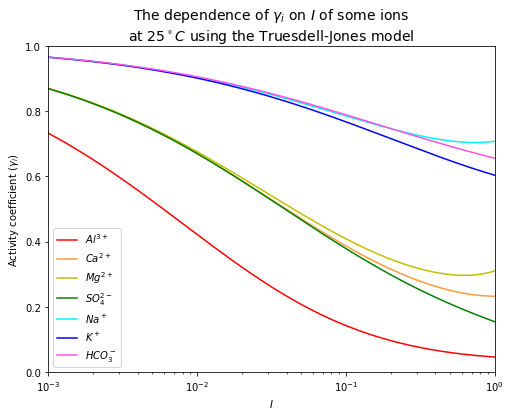

In [5]:
# plot the dependence of yi on I of some ions at 25 C using the Truesdell-Jones model
plt.figure(figsize=(8,6))
I = np.linspace(0.001, 1, 10000)
ions = ['$Al^{3+}$', '$Ca^{2+}$', '$Mg^{2+}$', '$SO_4^{2-}$', '$Na^+$', '$K^+$', '$HCO_3^-$']
colors = ['r', '#FF9B3C', 'y', 'g', '#00F3FF', 'b', '#FF52E5']
A = A_data[T_data.index(25)]
B = B_data[T_data.index(25)]

for i in range(len(ions)):  # loop to plot for each ion
    ao = Truesdell_Jones_ao_data[ions_data.index(ions[i])]
    b = Truesdell_Jones_b_data[ions_data.index(ions[i])]
    plt.plot(I, yi_Truesdell_Jones_model(A, ions[i], I, ao, B, b), colors[i], label=ions[i])

plt.xlabel('$I$')
plt.ylabel('Activity coefficient $(\gamma_i)$')
plt.xlim([0.001, 1])
plt.ylim([0, 1])
plt.xscale("log")
plt.title('The dependence of $\gamma_i$ on $I$ of some ions\nat $25^\circ C$ using the Truesdell-Jones model', fontsize=14)
plt.legend(loc='best', fontsize=10)

It can be seen from the plot above that different ions have different activity coefficients, depending on their charges and ionic radii.

To get a sense of the importance of the difference between activity and concentration, you can compare the values you get for $a_i = \gamma_im_i$ VS $m_i$. They can be very different.

## Lesson 3 - Problem 3 (Aqueous solutions: the Thames river estuary)

The following data were collected from samples from the Thames river.

In [6]:
# Data collected from samples from the Thames river
species = ['$SiO_2$', '$Ca^{2+}$', '$Mg^{2+}$', '$Na^+$', '$K^+$', '$HCO_3^-$', '$SO_4^{2-}$', '$NO_3^-$']
concentrations = [15, 49, 14, 5.4, 3.1, 168, 40, 4.3]  # mg/l

dict3 = {'Species' : species,
        'Concentration $(mg/l)$' : concentrations}
df3 = pd.DataFrame(dict3)
df3.loc[:, 'Concentration $(mg/l)$'] = df3['Concentration $(mg/l)$'].map('{:.1f}'.format)
display(df3.style.hide_index())

Species,Concentration $(mg/l)$
$SiO_2$,15.0
$Ca^{2+}$,49.0
$Mg^{2+}$,14.0
$Na^+$,5.4
$K^+$,3.1
$HCO_3^-$,168.0
$SO_4^{2-}$,40.0
$NO_3^-$,4.3


a) Unfortunately, the technician who performed these chemical analyses was lazy and forgot to write the charges for each ion. Which of these species are ionic and what is the charges corresponding to these ions in this river sample? Add the correct charges to the data table above.

See annotations in table above.

b) What is the molal ionic strength of this water sample? (beware of units, convert from $mg/l$ to $mol/kg$)?

Assume the density of water is $1000\,g/l$.

In [7]:
# function for converting the unit of concentration from mg/l to mol/kg (m)
def convert_mg_per_l_to_m(ion, conc, show_calculation=False):
    MW = molar_mass_calculator(ion)
    m = conc*(10**-3)/MW
    if show_calculation:
        return r"$${%.1f\left(\frac{mg}{l}\right) \cdot 10^{-3}\left(\frac{g}{mg}\right) \cdot \frac{1}{%.2f}\left(\frac{mol}{g}\right)\
        \cdot \frac{1}{1000}\left(\frac{l}{g}\right) \cdot \frac{1000}{1}\left(\frac{g}{kg}\right) = \
        %.2f \cdot 10^{-3} \left(\frac{mol}{kg}\right)}$$" % (conc, MW, m*1000)
    else:
        return m
    

# Create a table to show a detailed unit conversion
conversions_to_m = [convert_mg_per_l_to_m(species[i], concentrations[i], True) for i in range(len(species))]

dict4 = {'Species' : species,
        'Concentration (m = mol/kg)' : conversions_to_m}
df4 = pd.DataFrame(dict4)
display(df4.style.hide_index().set_properties(**{'text-align': 'middle'}))

# Find ionic strength (I)
concentrations_m = [convert_mg_per_l_to_m(species[i], concentrations[i], False) for i in range(len(species))]
I = ionic_strength(species, concentrations_m)
print("The ionic strength is %.2e m." % (I))

Species,Concentration (m = mol/kg)
$SiO_2$,$${15.0\left(\frac{mg}{l}\right) \cdot 10^{-3}\left(\frac{g}{mg}\right) \cdot \frac{1}{60.08}\left(\frac{mol}{g}\right)\ \cdot \frac{1}{1000}\left(\frac{l}{g}\right) \cdot \frac{1000}{1}\left(\frac{g}{kg}\right) = \ 0.25 \cdot 10^{-3} \left(\frac{mol}{kg}\right)}$$
$Ca^{2+}$,$${49.0\left(\frac{mg}{l}\right) \cdot 10^{-3}\left(\frac{g}{mg}\right) \cdot \frac{1}{40.08}\left(\frac{mol}{g}\right)\ \cdot \frac{1}{1000}\left(\frac{l}{g}\right) \cdot \frac{1000}{1}\left(\frac{g}{kg}\right) = \ 1.22 \cdot 10^{-3} \left(\frac{mol}{kg}\right)}$$
$Mg^{2+}$,$${14.0\left(\frac{mg}{l}\right) \cdot 10^{-3}\left(\frac{g}{mg}\right) \cdot \frac{1}{24.30}\left(\frac{mol}{g}\right)\ \cdot \frac{1}{1000}\left(\frac{l}{g}\right) \cdot \frac{1000}{1}\left(\frac{g}{kg}\right) = \ 0.58 \cdot 10^{-3} \left(\frac{mol}{kg}\right)}$$
$Na^+$,$${5.4\left(\frac{mg}{l}\right) \cdot 10^{-3}\left(\frac{g}{mg}\right) \cdot \frac{1}{22.99}\left(\frac{mol}{g}\right)\ \cdot \frac{1}{1000}\left(\frac{l}{g}\right) \cdot \frac{1000}{1}\left(\frac{g}{kg}\right) = \ 0.23 \cdot 10^{-3} \left(\frac{mol}{kg}\right)}$$
$K^+$,$${3.1\left(\frac{mg}{l}\right) \cdot 10^{-3}\left(\frac{g}{mg}\right) \cdot \frac{1}{39.10}\left(\frac{mol}{g}\right)\ \cdot \frac{1}{1000}\left(\frac{l}{g}\right) \cdot \frac{1000}{1}\left(\frac{g}{kg}\right) = \ 0.08 \cdot 10^{-3} \left(\frac{mol}{kg}\right)}$$
$HCO_3^-$,$${168.0\left(\frac{mg}{l}\right) \cdot 10^{-3}\left(\frac{g}{mg}\right) \cdot \frac{1}{61.02}\left(\frac{mol}{g}\right)\ \cdot \frac{1}{1000}\left(\frac{l}{g}\right) \cdot \frac{1000}{1}\left(\frac{g}{kg}\right) = \ 2.75 \cdot 10^{-3} \left(\frac{mol}{kg}\right)}$$
$SO_4^{2-}$,$${40.0\left(\frac{mg}{l}\right) \cdot 10^{-3}\left(\frac{g}{mg}\right) \cdot \frac{1}{96.06}\left(\frac{mol}{g}\right)\ \cdot \frac{1}{1000}\left(\frac{l}{g}\right) \cdot \frac{1000}{1}\left(\frac{g}{kg}\right) = \ 0.42 \cdot 10^{-3} \left(\frac{mol}{kg}\right)}$$
$NO_3^-$,$${4.3\left(\frac{mg}{l}\right) \cdot 10^{-3}\left(\frac{g}{mg}\right) \cdot \frac{1}{62.00}\left(\frac{mol}{g}\right)\ \cdot \frac{1}{1000}\left(\frac{l}{g}\right) \cdot \frac{1000}{1}\left(\frac{g}{kg}\right) = \ 0.07 \cdot 10^{-3} \left(\frac{mol}{kg}\right)}$$


The ionic strength is 6.00e-03 m.


c) Compute the ion activity coefficients for $Ca^{2+}$ and $HCO_3^-$ using the values for the various constants from the data tables provided in the notes (these are from K. Misra’s book, chapter 7). Choose a temperature that is characteristic of London. 

    (i) Use the Debye-Hueckel model.
    (ii) Use the Davies model.
    (iii) Use the Truesdell-Jones model.

Let’s choose $T=15^\circ C$, which is probably about the annual average temperature in London. 

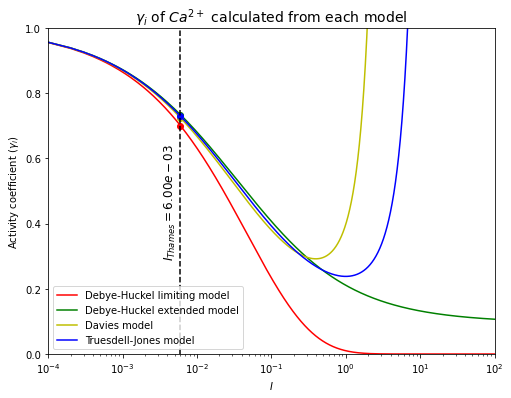

Using the Debye-Huckel limiting model, $\gamma_{Ca^{2+}}$=0.70
Using the Debye-Huckel extended model, $\gamma_{Ca^{2+}}$=0.73
Using the Davies model, $\gamma_{Ca^{2+}}$=0.72
Using the Truesdell-Jones model, $\gamma_{Ca^{2+}}$=0.73


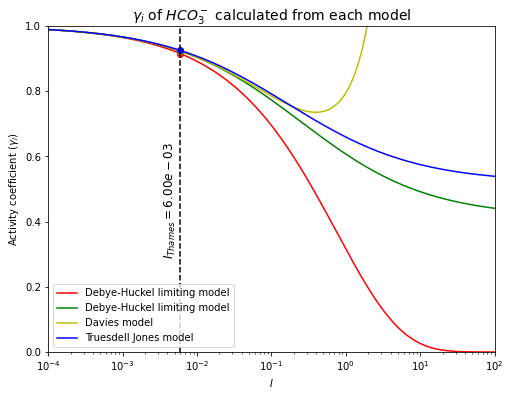

Using the Debye-Huckel limiting model, $\gamma_{HCO_3^-}$=0.91
Using the Debye-Huckel extended model, $\gamma_{HCO_3^-}$=0.92
Using the Davies model, $\gamma_{HCO_3^-}$=0.92
Using the Truesdell-Jones model, $\gamma_{HCO_3^-}$=0.92


In [8]:
## Temperature-independent parameters (A, B)
T = 15  # A temperature that is characteristic of London
T_index = T_data.index(T)
A = A_data[T_index]  # A at T = 15 C 
B = B_data[T_index]  # B at T = 15 C 

## parameters for each model
# Ca2+
Ca_index = ions_data.index("$Ca^{2+}$")
Debye_Huckel_ao_Ca = Debye_Huckel_ao_data[Ca_index]
Truesdell_Jones_ao_Ca = Truesdell_Jones_ao_data[Ca_index]
Truesdell_Jones_b_Ca = Truesdell_Jones_b_data[Ca_index]
# HCO3-
HCO3_index = ions_data.index("$HCO_3^-$")
Debye_Huckel_ao_HCO3 = Debye_Huckel_ao_data[HCO3_index]
Truesdell_Jones_ao_HCO3 = Truesdell_Jones_ao_data[HCO3_index]
Truesdell_Jones_b_HCO3 = Truesdell_Jones_b_data[HCO3_index]

# ionic strength of the water from the Thames river
I_thames = ionic_strength(species, concentrations_m)

# plot for Ca2+
plt.figure(figsize=(8,6))
I = np.linspace(0.0001, 100, 1000000)
plt.plot(I, yi_Debye_Huckel_limiting_model(A, "$Ca^{2+}$", I), 'r', label="Debye-Huckel limiting model")
plt.plot(I_thames, yi_Debye_Huckel_limiting_model(A, "$Ca^{2+}$", I_thames), 'ro')
plt.plot(I, yi_Debye_Huckel_extended_model(A, "$Ca^{2+}$", I, Debye_Huckel_ao_Ca, B), 'g', label="Debye-Huckel extended model")
plt.plot(I_thames, yi_Debye_Huckel_extended_model(A, "$Ca^{2+}$", I_thames, Debye_Huckel_ao_Ca, B), 'go')
plt.plot(I, yi_Davies_model(A, "$Ca^{2+}$", I), 'y', label="Davies model")
plt.plot(I_thames, yi_Davies_model(A, "$Ca^{2+}$", I_thames), 'yo')
plt.plot(I, yi_Truesdell_Jones_model(A, "$Ca^{2+}$", I, Truesdell_Jones_ao_Ca, B, Truesdell_Jones_b_Ca), 'b', label="Truesdell-Jones model")
plt.plot(I_thames, yi_Truesdell_Jones_model(A, "$Ca^{2+}$", I_thames, Truesdell_Jones_ao_Ca, B, Truesdell_Jones_b_Ca), 'bo')
plt.plot([I_thames, I_thames], [0, 1], 'k--')
plt.text(0.0035, 0.3, '$I_{Thames}=%.2e$' % (I_thames), fontsize=12, rotation=90)

plt.xlabel('$I$')
plt.ylabel('Activity coefficient $(\gamma_i)$')
plt.xlim([0.0001, 100])
plt.ylim([0, 1])
plt.xscale("log")
plt.title('$\gamma_i$ of $Ca^{2+}$ calculated from each model', fontsize=14)
plt.legend(loc='lower left', fontsize=10)
plt.show()

# print values
print("Using the Debye-Huckel limiting model, $\gamma_{Ca^{2+}}$=%.2f" \
      % (yi_Debye_Huckel_limiting_model(A, "$Ca^{2+}$", I_thames)))
print("Using the Debye-Huckel extended model, $\gamma_{Ca^{2+}}$=%.2f" \
      % (yi_Debye_Huckel_extended_model(A, "$Ca^{2+}$", I_thames, Debye_Huckel_ao_Ca, B)))
print("Using the Davies model, $\gamma_{Ca^{2+}}$=%.2f" \
      % (yi_Davies_model(A, "$Ca^{2+}$", I_thames)))
print("Using the Truesdell-Jones model, $\gamma_{Ca^{2+}}$=%.2f" \
      % (yi_Truesdell_Jones_model(A, "$Ca^{2+}$", I_thames, Truesdell_Jones_ao_Ca, B, Truesdell_Jones_b_Ca)))

# plot for HCO3-
plt.figure(figsize=(8,6))
I = np.linspace(0.0001, 100, 1000000)
plt.plot(I, yi_Debye_Huckel_limiting_model(A, "$HCO_3^-$", I), 'r', label="Debye-Huckel limiting model")
plt.plot(I_thames, yi_Debye_Huckel_limiting_model(A, "$HCO_3^-$", I_thames), 'ro')
plt.plot(I, yi_Debye_Huckel_extended_model(A, "$HCO_3^-$", I, Debye_Huckel_ao_HCO3, B), 'g', label="Debye-Huckel limiting model")
plt.plot(I_thames, yi_Debye_Huckel_extended_model(A, "$HCO_3^-$", I_thames, Debye_Huckel_ao_HCO3, B), 'go')
plt.plot(I, yi_Davies_model(A, "$HCO_3^-$", I), 'y', label="Davies model")
plt.plot(I_thames, yi_Davies_model(A, "$HCO_3^-$", I_thames), 'yo')
plt.plot(I, yi_Truesdell_Jones_model(A, "$HCO_3^-$", I, Truesdell_Jones_ao_HCO3, B, Truesdell_Jones_b_HCO3), 'b', label="Truesdell Jones model")
plt.plot(I_thames, yi_Truesdell_Jones_model(A, "$HCO_3^-$", I_thames, Truesdell_Jones_ao_HCO3, B, Truesdell_Jones_b_HCO3), 'bo')
plt.plot([I_thames, I_thames], [0, 1], 'k--')
plt.text(0.0035, 0.3, '$I_{Thames}=%.2e$' % (I_thames), fontsize=12, rotation=90)

plt.xlabel('$I$')
plt.ylabel('Activity coefficient $(\gamma_i)$')
plt.xlim([0.0001, 100])
plt.ylim([0, 1])
plt.xscale("log")
plt.title('$\gamma_i$ of $HCO_3^-$ calculated from each model', fontsize=14)
plt.legend(loc='lower left', fontsize=10)
plt.show()

# print values
print("Using the Debye-Huckel limiting model, $\gamma_{HCO_3^-}$=%.2f" \
      % (yi_Debye_Huckel_limiting_model(A, "$HCO_3^-$", I_thames)))
print("Using the Debye-Huckel extended model, $\gamma_{HCO_3^-}$=%.2f" \
      % (yi_Debye_Huckel_extended_model(A, "$HCO_3^-$", I_thames, Debye_Huckel_ao_HCO3, B)))
print("Using the Davies model, $\gamma_{HCO_3^-}$=%.2f" \
      % (yi_Davies_model(A, "$HCO_3^-$", I_thames)))
print("Using the Truesdell-Jones model, $\gamma_{HCO_3^-}$=%.2f" \
      % (yi_Truesdell_Jones_model(A, "$HCO_3^-$", I_thames, Truesdell_Jones_ao_HCO3, B, Truesdell_Jones_b_HCO3)))

The activity coefficient of $Ca^{2+}$ in the Thames river has been calculated. 

$\quad$Using the Debye-Huckel limiting model, $\gamma_{Ca^{2+}}=0.70$.

$\quad$Using the Debye-Huckel extended model, $\gamma_{Ca^{2+}}=0.73$.

$\quad$Using the Davies model, $\gamma_{Ca^{2+}}=0.72$.

$\quad$Using the Truesdell-Jones model, $\gamma_{Ca^{2+}}=0.73$.

The activity coefficient of $HCO_3^-$ in the Thames river has been calculated. 

$\quad$Using the Debye-Huckel limiting model, $\gamma_{HCO_3^-}=0.91$.

$\quad$Using the Debye-Huckel extended model, $\gamma_{HCO_3^-}=0.92$.

$\quad$Using the Davies model, $\gamma_{HCO_3^-}=0.92$.

$\quad$Using the Truesdell-Jones model, $\gamma_{HCO_3^-}=0.92$.

From both of the plots, they can be seen that calculating activity coefficients by different models give different results. All OK at low ionic strength but gets worst!

d) How different are the activity coefficients that you calculate for each model? Are these differences large, small, do they matter? Try to provide a quantitative answer (i.e find a way to quantify these differences, be creative). Why are there differences between the solutions from the different models?

In this case, the differences between the various solutions are tiny, insignificant in fact when contrasted with the uncertainties that could arise from the
concentration measurements themselves. One could quantify these differences by computing the standard deviation between the 4 estimates for each ion for example. It just wouldn’t be that interesting as they are all nearly identical, so the uncertainty from differences in fitting is negligible. Note that this would not be the case at higher ionic strength. As ionic strength increases, divergence between the models also increase. Differences, should there be any, come from the different assumptions about the terms in the model, with the Truesdell-Jones being the most general model, and the others being limiting cases. 

e) Recall that $a_i = \gamma_i m_i$. Are the activities of these ions very different from their molal concentrations?

Since $a_i = \gamma_i m_i$, we can calculate $\gamma_i m_i$ from our calculated coefficients from the previous question (c) and contrast this with the measurements of $m_i$.

For $Ca^{2+}$,

$$\gamma_{Ca^{2+}} = 0.73$$

$$a_{Ca^{2+}} = m_{Ca^{2+}}\gamma_{Ca^{2+}} = 1.22\cdot10^{-3}\cdot0.73 = 8.9\cdot10^{-4}\,m$$

For $HCO_3^-$,

$$\gamma_{HCO_3^-} = 0.92$$

$$a_{HCO_3^-} = m_{HCO_3^-}\gamma_{HCO_3^-} = 2.75\cdot10^{-3}\cdot0.92 = 2.5\cdot10^{-3}\,m$$

Looking at the activities, the ratio of calcium to bicarbonate ions is $0.89/2.5 =0.36$.

Looking at concentrations, the ratio of calcium to bicarbonate ions is $1.22/2.75=0.44$.

By accounting for the differences in activities, we see that while the overall effective concentration of both ions decreased, they decreased differently for calcium and bicarbonate ions. Accounting for activity coefficients, the “effective concentration” of calcium ions was more affected than bicarbonate ions. 

f) Describe what happens to ionic strength in an estuary, as river water progressively enters seawater?

As river water enters the estuary, the salinity of the water increases, from freshwater to seawater. Salinity is high because there is a lot more salt in seawater than in river water. More salt means higher ionic strength in seawater than in freshwater. The typical seawater ionic strength is about $I=0.7$, which is about 1000x more than river water! This means that there will be large changes in the activities of the various constituents (ions) in rivers through the estuary. Since each ion will be affected slightly differently, activity coefficients being ion-specific, this means that the relative “effective concentrations” between ions will evolve as we move from freshwater to seawater. The end result could be that some reactions that are thermodynamically favorable in the forward direction in freshwater could be favorable in the backward direction in seawater! 

## References

- Lecture slide and Practical for Lecture 3 of the Low-Temperature Geochemistry module
- Misra, K.C. (2012). Introduction to geochemistry : principles and applications. Wiley-Blackwell.
- White, W. (2013). Geochemistry. Wiley-Blackwell.